In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
import pandas as pd
from IPython.core.display import display, HTML
# %matplotlib notebook
# %matplotlib notebook
import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import os, glob
import cv2
import dlib
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, euclidean
from scipy import stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from sklearn.model_selection import train_test_split
# import the necessary packages
from skimage import feature, io, color
from scipy.stats import moment, describe
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import statsmodels.formula.api as smfapi
import statsmodels.api as smapi
from scipy.stats import f as f_test

from Utils.DataUtils import *
from Utils.UtilsViz import *


import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

In [8]:
data = pd.read_csv("./data/analysis.csv")
data.drop("patient_id", inplace=True, axis=1)
ycol = ["heart_disease_present"]
xcols = [c for c in data.columns if c not in ycol]
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


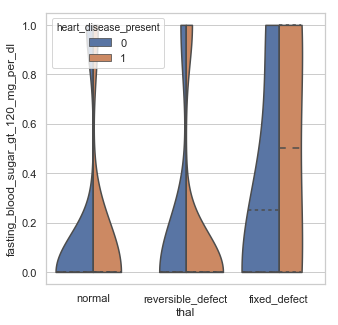

In [22]:
f,ax=plt.subplots(1,1,figsize=(5,5))
g = sns.violinplot(y="fasting_blood_sugar_gt_120_mg_per_dl", x="thal", data=data, ax=ax, cut=0, inner="quartile", hue="heart_disease_present", split=True)